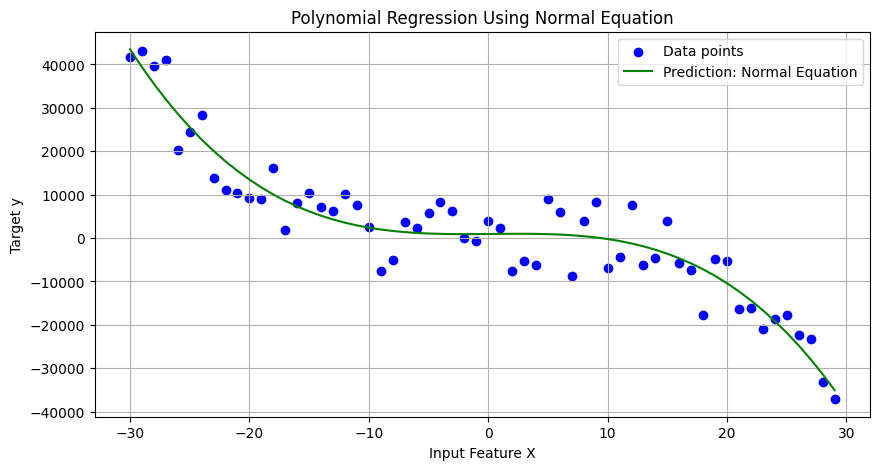

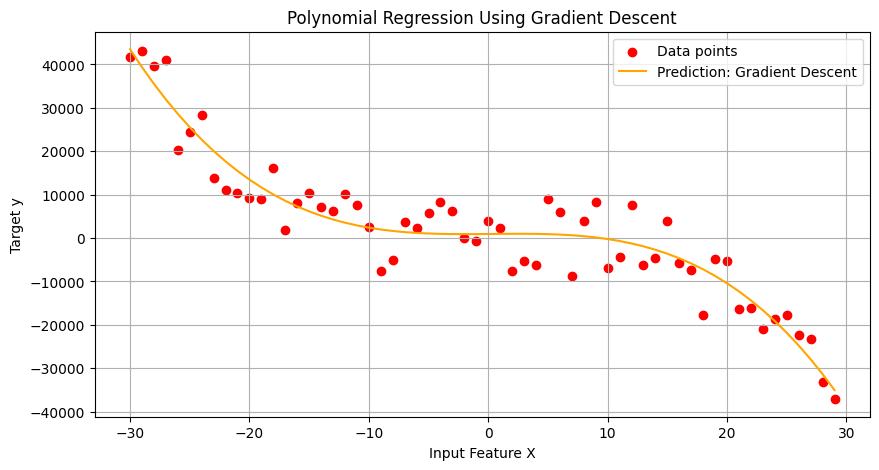

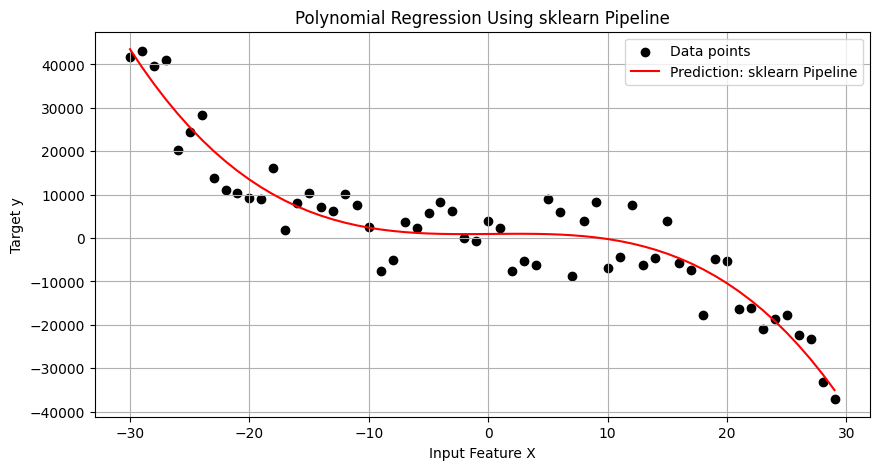

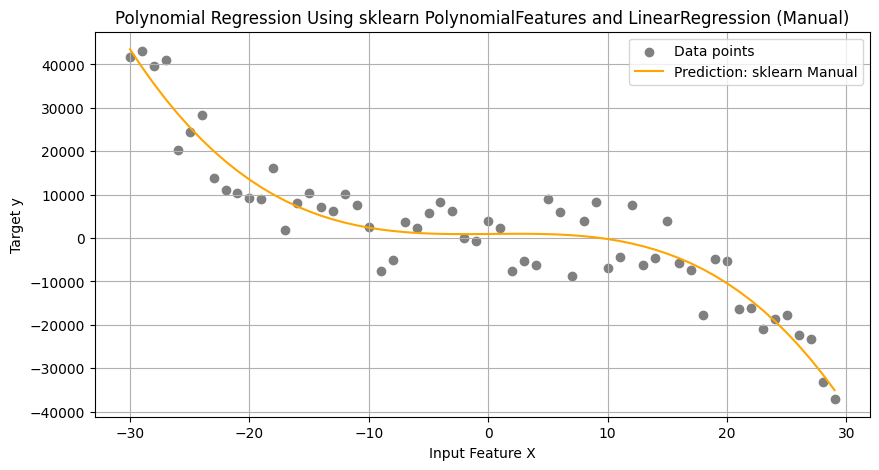

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Function to generate random data points between r1 and r2 for each element in data
def datapoints(r1, r2, data):
    return (r1 - r2) * np.random.rand(len(data)).reshape(-1, 1) + r2

# Generate polynomial features up to a given degree, optionally standardizing each feature
def polynomial_features(data, degree, std=False):
    poly_features = np.ones((data.shape[0], 1))  # bias term (x^0)
    for x in range(1, degree + 1):
        x_push = data ** x
        if std:
            x_push = (x_push - x_push.mean()) / x_push.std()
        poly_features = np.hstack((poly_features, x_push))
    return poly_features

# Compute weights using the normal equation
def normal_equation(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y 

# Predict output given inputs and weights
def pred(x, weight):
    return x @ weight

# Gradient descent algorithm to optimize weights
def gradient_descent(x, y, lr=0.01, iter=30000):
    weight = np.ones((x.shape[1], 1))
    n = x.shape[0]
    for _ in range(iter):
        weight -= lr * (2 / n) * (x.T @ (pred(x, weight) - y))
    return weight

# Generate X values from -30 to 29
X = np.array([x for x in range(-30, 30)], dtype=np.float64).reshape(-1, 1)

# Generate target y with polynomial relationship and some noise
y = datapoints(-1e4, 1e4, X) - 0.5 * X + 3 * X ** 2 - (6 / 4) * X ** 3

# --- Using Normal Equation ---
poly_fea = polynomial_features(X, 3)  # degree 3 polynomial features without standardization
pred_weight = normal_equation(poly_fea, y)  # calculate weights analytically
y_pred = pred(poly_fea, pred_weight)  # predict output

plt.figure(figsize=(10, 5))
plt.scatter(X, y, color="blue", label="Data points")
plt.plot(X, y_pred, color="green", label="Prediction: Normal Equation")
plt.title("Polynomial Regression Using Normal Equation")
plt.xlabel("Input Feature X")
plt.ylabel("Target y")
plt.legend()
plt.grid(True)
plt.show()

# --- Using Gradient Descent ---
poly_fea = polynomial_features(X, 3, std=True)  # polynomial features with standardization for gradient descent
pred_weight = gradient_descent(poly_fea, y)  # optimize weights using gradient descent
y_pred = pred(poly_fea, pred_weight)  # predicted values

plt.figure(figsize=(10, 5))
plt.scatter(X, y, label="Data points", color="red")
plt.plot(X, y_pred, label="Prediction: Gradient Descent", color="orange")
plt.title("Polynomial Regression Using Gradient Descent")
plt.xlabel("Input Feature X")
plt.ylabel("Target y")
plt.legend()
plt.grid(True)
plt.show()

# --- Using sklearn Pipeline ---
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

model = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
model.fit(X, y)
y_pred = model.predict(X)

plt.figure(figsize=(10, 5))
plt.scatter(X, y, color="black", label="Data points")
plt.plot(X, y_pred, color="red", label="Prediction: sklearn Pipeline")
plt.title("Polynomial Regression Using sklearn Pipeline")
plt.xlabel("Input Feature X")
plt.ylabel("Target y")
plt.legend()
plt.grid(True)
plt.show()

# --- Using sklearn PolynomialFeatures and LinearRegression separately (without pipeline) ---
poly = PolynomialFeatures(degree=3)
poly_fea = poly.fit_transform(X)

model = LinearRegression()
model.fit(poly_fea, y)
y_pred = model.predict(poly.transform(X))

plt.figure(figsize=(10, 5))
plt.scatter(X, y, label="Data points", color="grey")
plt.plot(X, y_pred, label="Prediction: sklearn Manual", color="orange")
plt.title("Polynomial Regression Using sklearn PolynomialFeatures and LinearRegression (Manual)")
plt.xlabel("Input Feature X")
plt.ylabel("Target y")
plt.legend()
plt.grid(True)
plt.show()